✅ Libraries imported successfully!

📤 Please upload a single grayscale or well-lit image (e.g., a face, sphere, or relief object):


Saving images-2.jpeg to images-2.jpeg
✅ Image 'images-2.jpeg' uploaded successfully!


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127748 (\N{SUNRISE OVER MOUNTAINS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


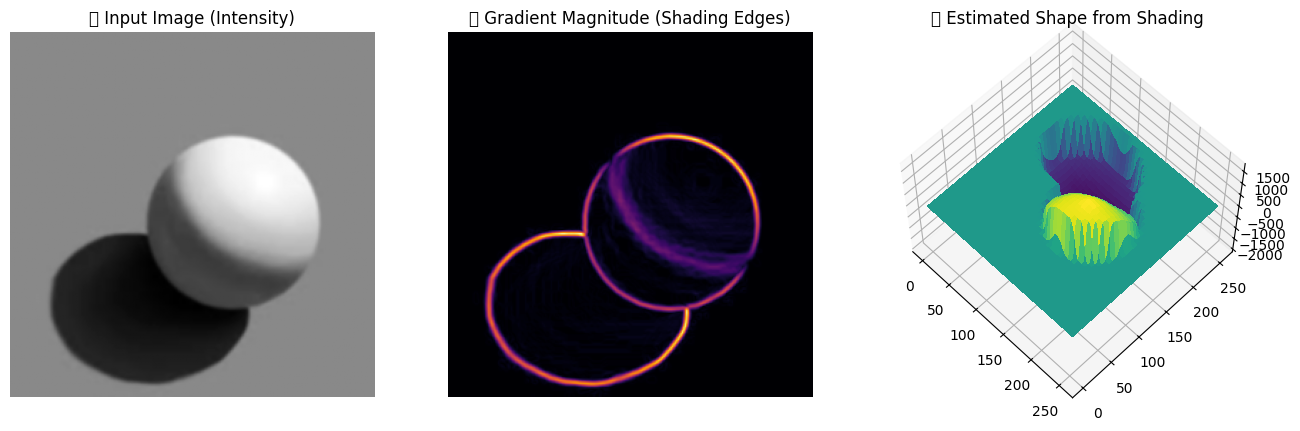

In [1]:
# ============================================================================
# 🟢 SHAPE FROM SHADING (SFS) - 3D Vision Demonstration
# ============================================================================
# This code estimates surface shape (height map) from light intensity variations.

# STEP 1: Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D

print("✅ Libraries imported successfully!")

# STEP 2: Upload Grayscale Image (Object with visible lighting)
print("\n📤 Please upload a single grayscale or well-lit image (e.g., a face, sphere, or relief object):")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(f"✅ Image '{filename}' uploaded successfully!")

# STEP 3: Load and Preprocess Image
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("❌ Could not read the uploaded image. Try again.")

img = cv2.resize(img, (256, 256))  # Resize for simplicity
img = cv2.GaussianBlur(img, (5,5), 0)  # Reduce noise

# STEP 4: Compute Image Gradients (simulate shading slopes)
gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, ksize=3)
grad_mag = np.sqrt(gx**2 + gy**2)

# STEP 5: Estimate "Surface" from Gradient Integration (pseudo-shape)
depth_map = np.cumsum(gy, axis=0) + np.cumsum(gx, axis=1)

# STEP 6: Visualize Results
fig = plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
plt.title("🖼️ Input Image (Intensity)")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("📈 Gradient Magnitude (Shading Edges)")
plt.imshow(grad_mag, cmap='inferno')
plt.axis('off')

ax = fig.add_subplot(1,3,3, projection='3d')
X, Y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
ax.plot_surface(X, Y, depth_map, cmap='viridis', linewidth=0, antialiased=False)
ax.set_title("🌄 Estimated Shape from Shading")
ax.view_init(60, -45)

plt.show()

# EXPLANATION:
# - Left: Original lit image (light variations)
# - Middle: Computed gradient intensity (surface slope)
# - Right: Estimated 3D surface reconstructed from light and gradient info
